In [13]:
import math
import time
from moviepy.editor import VideoFileClip

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
def read_img(str_path):
    image = cv.imread(str_path)
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return image

In [15]:
def show_img(ima):
    cv.imshow('image', ima)
    cv.waitKey()
    return 0

In [16]:
def blured_img(gry_img):
    blr_img = cv.GaussianBlur(gry_img, (5, 5), 0)
    return blr_img

In [17]:
def edge_detection(blr_img):
    edges = cv.Canny(blr_img, 100, 200)
    return edges

In [18]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255  # This line altered for grayscale.

    cv.fillPoly(mask, vertices, 255)
    masked_image = cv.bitwise_and(img, mask)
    return masked_image

In [19]:
def draw_line(img, lineP, color=(0, 255, 75), thickness=5):
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype="uint8"
    )

    img = np.copy(img)
    if lineP is not None:
        for l in lineP:

            cv.line(line_img, (int(l[0]), int(l[1])),
                    (int(l[2]), int(l[3])), color, thickness)

        img = cv.addWeighted(img, 0.6, line_img, 1.0, 0.0)
        return img

In [20]:
def region_of_interest_vertices(source_image):
    height, width= source_image.shape

    vertices = [
        (width / 1.7, height / 2.2),
        (width / 2, height / 2.2),
        (width / 6, height / 1.5),
        (0, height),
        (width, height),
        (width / 1.1, height / 1.5),
    ]

    return vertices

In [34]:
def draw_straight_line(source_image, edge):
    left_line_x = []
    left_line_y = []
    right_line_x = []
    right_line_y = []


    linesP = cv.HoughLinesP(
        edge,
        rho=6,
        theta=np.pi / 180,
        threshold=150,
        lines=np.array([]),
        minLineLength=40,
        maxLineGap=25
    )
    if linesP is not None:
        for line in linesP:
            for x1, y1, x2, y2 in line:
                slope = (y2 - y1) / (x2 - x1)
                if math.fabs(slope) < 0.5:
                    continue
                if slope <= 0:
                    left_line_x.extend([x1, x2])
                    left_line_y.extend([y1, y2])
                else:
                    right_line_x.extend([x1, x2])
                    right_line_y.extend([y1, y2])

        min_y = source_image.shape[0] * (2/5)
        max_y = source_image.shape[0]

        poly_left = np.poly1d(np.polyfit(
            left_line_y, left_line_x, 1
        ))

        left_x_begin = int(poly_left(max_y))
        left_x_end = int(poly_left(min_y))

        poly_right = np.poly1d(np.polyfit(
            right_line_y, right_line_x, 1
        ))

        right_x_begin = int(poly_right(max_y))
        right_x_end = int(poly_right(min_y))

        line_image = draw_line(source_image, [
            [left_x_begin, max_y, left_x_end, min_y],
            [right_x_begin, max_y, right_x_end, min_y],
        ])
        
        line_image = cv.cvtColor(line_image, cv.COLOR_BGR2RGB)
        return line_image
    return source_image


In [35]:
def processing(path):
    frame = read_img(path)
    blr_img = blured_img(frame)
    edges = edge_detection(blr_img)
    vertices = region_of_interest_vertices(frame)
    mask = region_of_interest(edges, np.array([vertices], np.int32))
    frame2 = cv.imread("data/a.png")
    drw = draw_straight_line(frame2, mask)
    plt.imshow(drw)
    #cv.imshow('frame', drw)
    #cv.waitKey(0)
    return 0

0

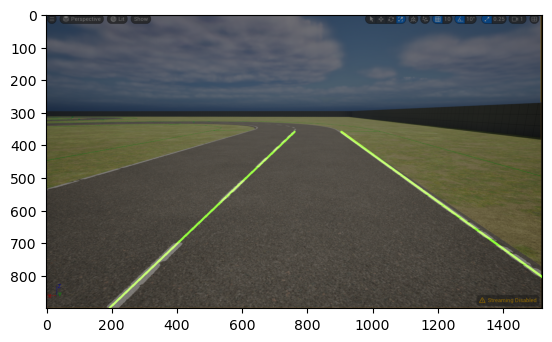

In [36]:
processing("data/a.png")